# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer
from sklearn import metrics
import statsmodels.api as sm

%matplotlib inline

# Get Cleaned Train Data

In [3]:
df_cl = pd.read_csv("../datasets/train_cleaned.csv")

In [4]:
df_cl.head()

,Id,PID,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,...,Log Lot Area * Log 1st Flr SF,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3
0,109,533352170,130500.0,0,0,0,0,0,1,0,...,62.645712,950.0,69.427079,14.598243,0.0,170,53.277174,388.876565,36,216
1,544,531379050,220000.0,0,0,0,0,0,1,0,...,63.732434,1118.0,71.617522,15.320229,0.0,156,58.677351,449.475220,49,343
2,153,535304180,109000.0,1,0,0,0,0,0,0,...,62.511335,246.0,62.511335,6.963190,0.0,171,48.486015,337.617333,25,125
3,318,916386060,174000.0,0,0,0,0,0,1,0,...,60.766917,800.0,66.861320,14.550345,0.0,12,52.928132,385.061283,25,125
4,255,906425045,138500.0,0,0,0,0,1,0,0,...,64.291594,968.0,69.582433,14.551729,0.0,1870,52.938206,385.171217,36,216


# Exploratory Data Analysis & Visualization

In [5]:
df_cl.drop(columns=["Id", "PID"], inplace=True)

In [6]:
corrs = df_cl.corr()

In [7]:
# list(corrs["SalePrice"])

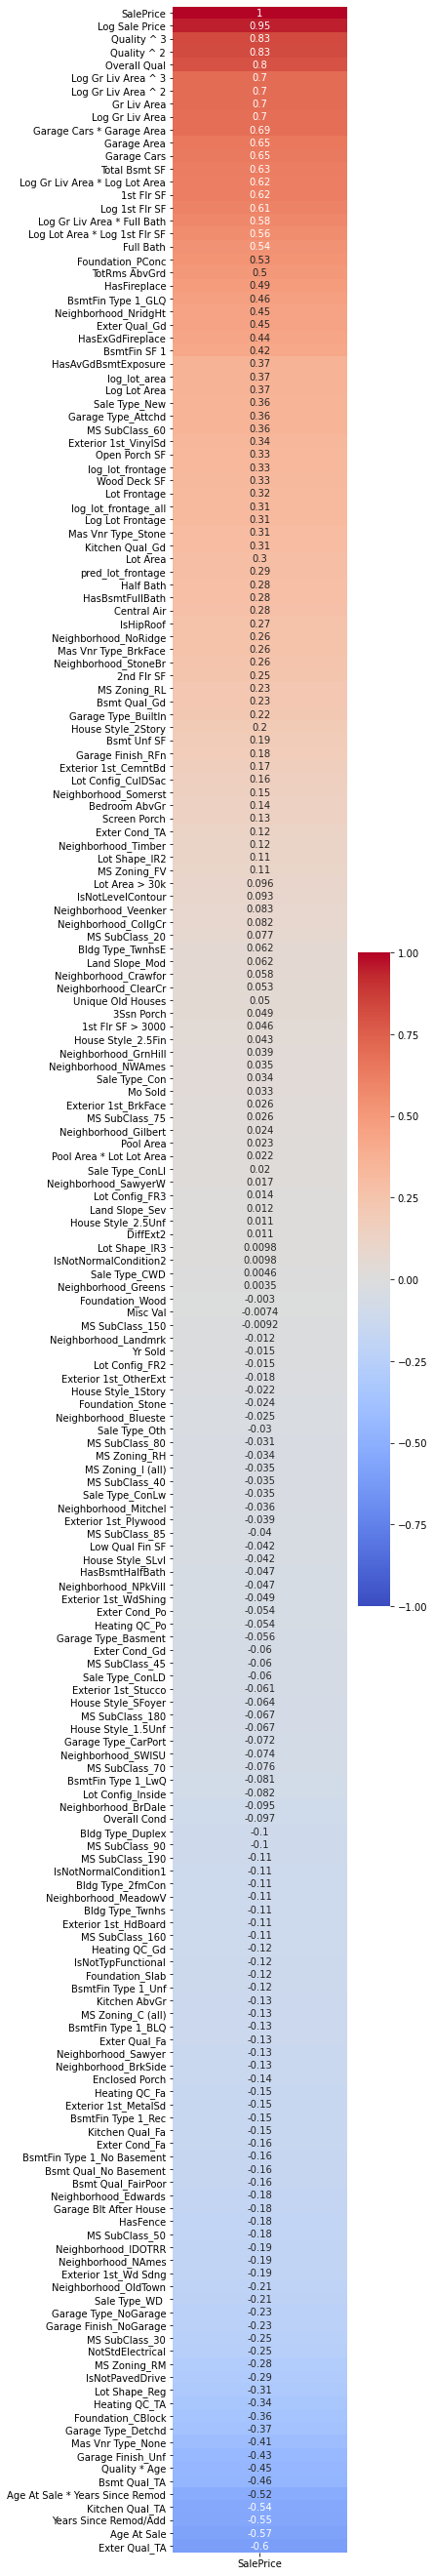

In [8]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl.corr()[["SalePrice"]].sort_values("SalePrice", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

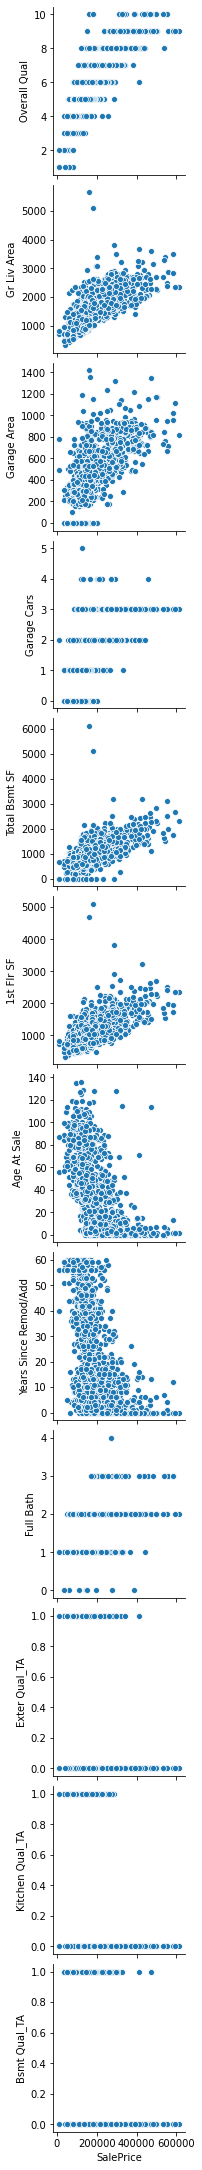

In [9]:
#Apparently can't change colors in pairplots unless you use the hue argument, which doesn't make sense here
sns.pairplot(df_cl, y_vars=["Overall Qual", "Gr Liv Area", "Garage Area", "Garage Cars",
                           "Total Bsmt SF", "1st Flr SF", "Age At Sale", "Years Since Remod/Add",
                           "Full Bath", "Exter Qual_TA", "Kitchen Qual_TA", "Bsmt Qual_TA"], x_vars=['SalePrice'])

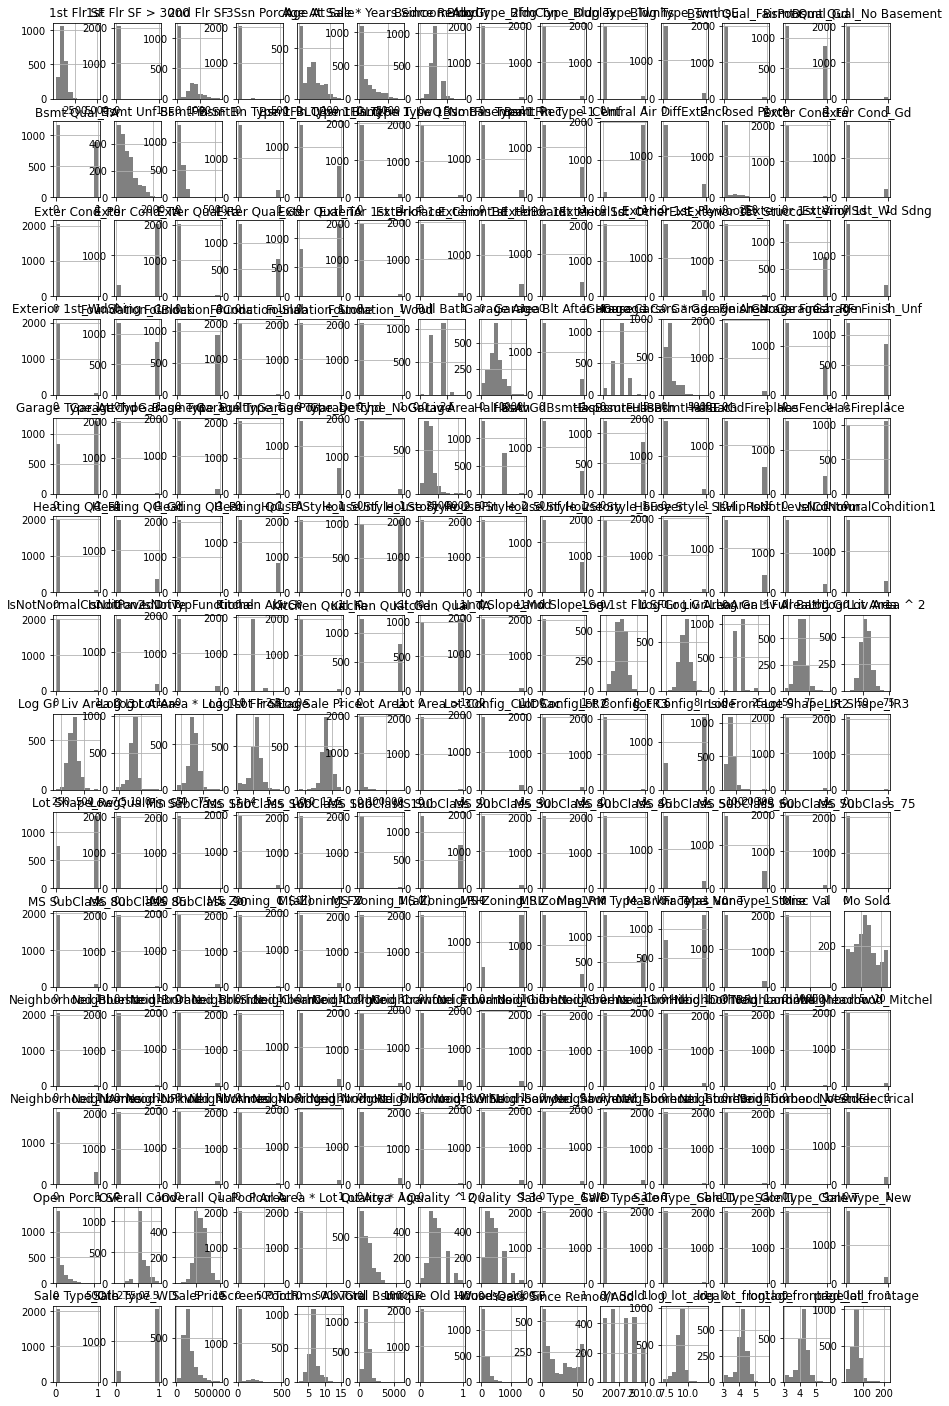

In [59]:
#This is ugly, just easy to see that most of the data is not naturally normally-distributed, so we'll need to 
#run some kind of transformation on the data. Will confirm more below.
df_cl.hist(figsize=(15,25), color="grey");

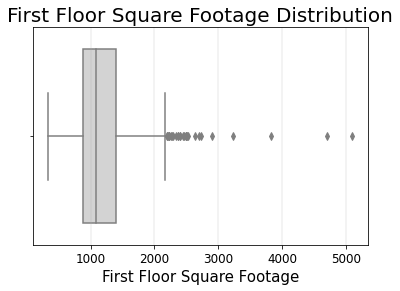

In [140]:
sns.boxplot(df_cl["1st Flr SF"], color="lightgrey")

plt.title("First Floor Square Footage Distribution", fontsize=20)
plt.xlabel("First Floor Square Footage", fontsize=15)
plt.grid(b=True, linewidth=0.3, axis='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

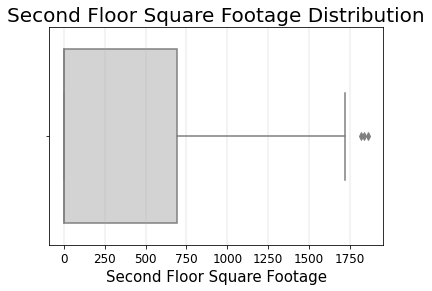

In [139]:
sns.boxplot(df_cl["2nd Flr SF"], color="lightgrey")
plt.title("Second Floor Square Footage Distribution", fontsize=20)
plt.xlabel("Second Floor Square Footage", fontsize=15)
plt.grid(b=True, linewidth=0.3, axis='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

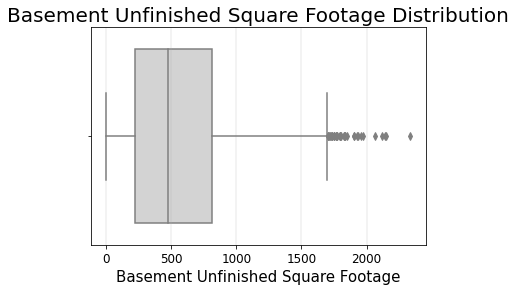

In [138]:
sns.boxplot(df_cl["Bsmt Unf SF"], color="lightgrey")

plt.title("Basement Unfinished Square Footage Distribution", fontsize=20)
plt.xlabel("Basement Unfinished Square Footage", fontsize=15)
plt.grid(b=True, linewidth=0.3, axis='x')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

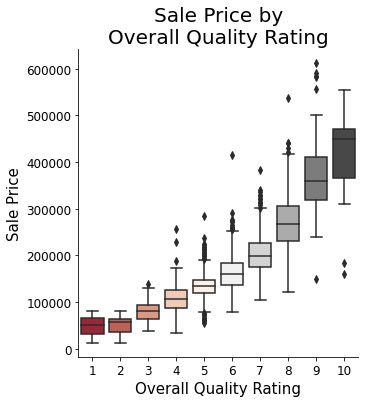

In [132]:
sns.catplot(data=df_cl, x="Overall Qual", y="SalePrice", kind='box', palette="RdGy")

plt.title("Sale Price by\nOverall Quality Rating", fontsize=20)
plt.xlabel("Overall Quality Rating", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

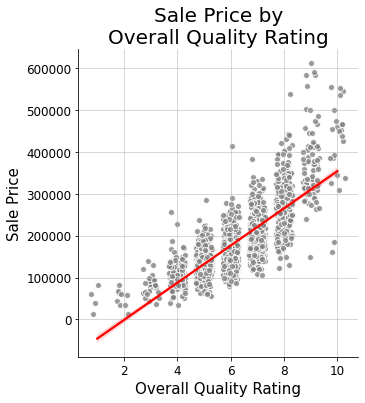

In [131]:
sns.lmplot(data=df_cl, x="Overall Qual", y="SalePrice", fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'},
           x_jitter=.3)

plt.title("Sale Price by\nOverall Quality Rating", fontsize=20)
plt.xlabel("Overall Quality Rating", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

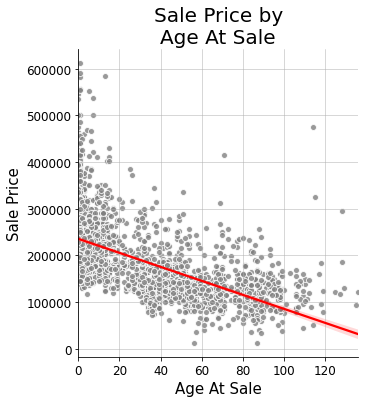

In [130]:
sns.lmplot(data=df_cl, x="Age At Sale", y="SalePrice", fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'})

plt.title("Sale Price by\nAge At Sale", fontsize=20)
plt.xlabel("Age At Sale", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

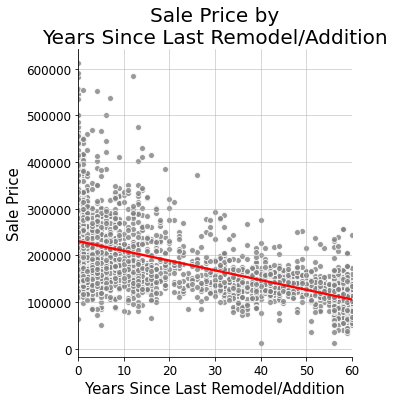

In [128]:
sns.lmplot(data=df_cl, x="Years Since Remod/Add", y="SalePrice", fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'})

plt.title("Sale Price by\nYears Since Last Remodel/Addition", fontsize=20)
plt.xlabel("Years Since Last Remodel/Addition", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

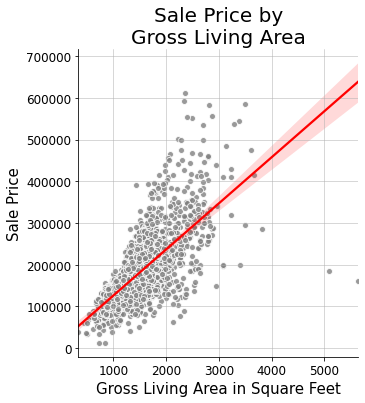

In [127]:
sns.lmplot(data=df_cl, x="Gr Liv Area", y="SalePrice", fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'})

plt.title("Sale Price by\nGross Living Area", fontsize=20)
plt.xlabel("Gross Living Area in Square Feet", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

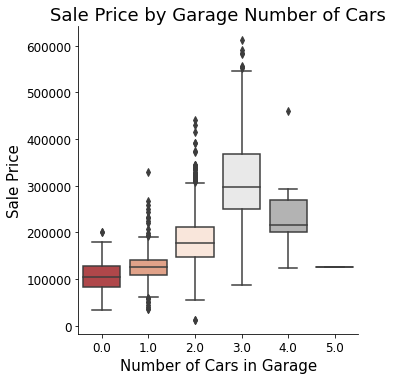

In [126]:
sns.catplot(data=df_cl, x="Garage Cars", y="SalePrice", kind='box', palette="RdGy" )
plt.title("Sale Price by Garage Number of Cars", fontsize=18)
plt.xlabel("Number of Cars in Garage", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

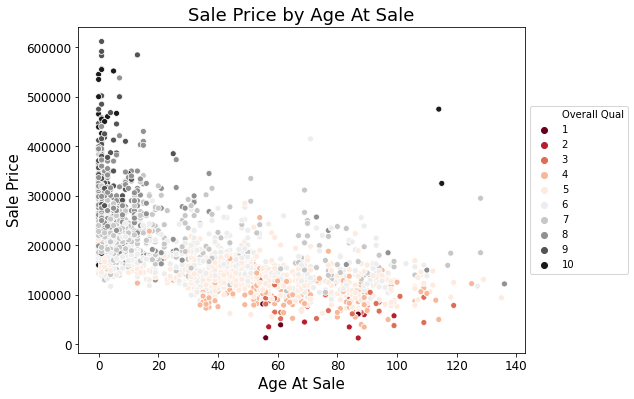

In [124]:
#This plot was reproduced in Tableau, as shown at the bottom of this file
plt.figure(figsize=(8,6))
g = sns.scatterplot(data=df_cl, x="Age At Sale", y="SalePrice", hue='Overall Qual', palette='RdGy',
                    legend='full')
plt.title("Sale Price by Age At Sale", fontsize=18)
plt.xlabel("Age At Sale", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

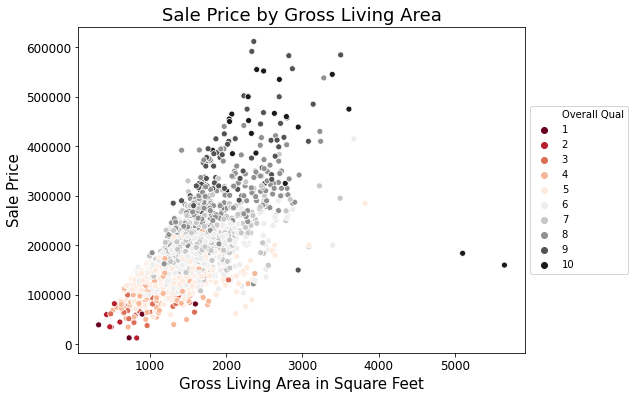

In [122]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(data=df_cl, x="Gr Liv Area", y="SalePrice", hue='Overall Qual', palette='RdGy',
                    legend='full')
plt.title("Sale Price by Gross Living Area", fontsize=18)
plt.xlabel("Gross Living Area in Square Feet", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [22]:
pd.set_option('display.max_columns', 177)

In [23]:
df_cl[df_cl["Gr Liv Area"] > 5_000]

,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Frontage,Lot Area,Lot Area > 30k,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,IsNotLevelContour,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,IsNotNormalCondition1,IsNotNormalCondition2,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Qual,Overall Cond,Age At Sale,Years Since Remod/Add,IsHipRoof,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,...,Bsmt Qual_FairPoor,Bsmt Qual_No Basement,HasAvGdBsmtExposure,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 1_No Basement,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air,NotStdElectrical,1st Flr SF,1st Flr SF > 3000,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,HasBsmtFullBath,HasBsmtHalfBath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual_Gd,Kitchen Qual_TA,Kitchen Qual_Fa,TotRms AbvGrd,IsNotTypFunctional,HasFireplace,HasExGdFireplace,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NoGarage,Garage Blt After House,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Garage Cars,Garage Area,IsNotPavedDrive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,HasFence,Misc Val,Mo Sold,Yr Sold,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Unique Old Houses,log_lot_area,pred_lot_frontage,log_lot_frontage,log_lot_frontage_all,Log Sale Price,Log 1st Flr SF,Log Gr Liv Area,Log Lot Area,Log Lot Frontage,Quality * Age,Log Lot Area * Log 1st Flr SF,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3
960,160000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,313.0,63887,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,10,5,0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,5644.0,466.0,6110.0,0,0,0,0,1,0,4692.0,1,950.0,0.0,5642.0,1,0,2,1,3,1,0,0,0,12,0,1,1,1,0,0,0,0,0,0,0,0,0,2.0,1418.0,0,214.0,292.0,0,0,0,480.0,0,0,1,2008,0,0,0,0,0,1,0,0,0,11.064871,204.596862,5.746203,5.746203,11.982929,8.453614,8.637994,11.064871,5.746203,0,93.538152,2836.0,95.578290,17.275988,5311.138165,0,74.614938,644.523383,100,1000
1885,183850.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,128.0,39290,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,5,1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,4010.0,1085.0,5095.0,0,0,0,0,1,0,5095.0,1,0.0,0.0,5095.0,1,1,2,1,2,1,0,0,0,15,0,1,1,1,0,0,0,0,0,0,0,0,0,3.0,1154.0,0,546.0,484.0,0,0,0,0.0,0,17000,10,2009,0,0,0,0,0,1,0,0,0,10.578725,156.350801,4.852030,4.852030,12

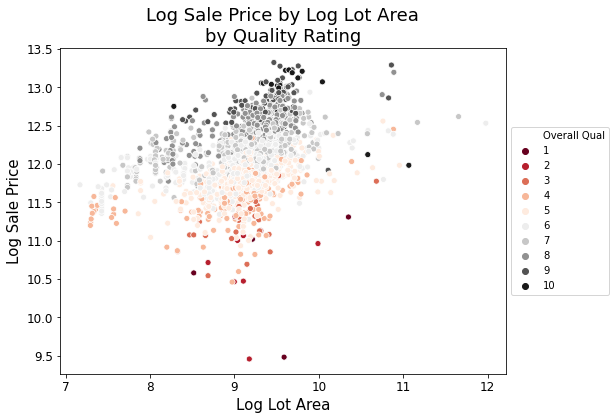

In [120]:
plt.figure(figsize=(8,6))
g = sns.scatterplot(data=df_cl, x="Log Lot Area", y="Log Sale Price", hue='Overall Qual', palette='RdGy',
                legend='full')
plt.title("Log Sale Price by Log Lot Area\nby Quality Rating", fontsize=18)
plt.xlabel("Log Lot Area", fontsize=15)
plt.ylabel("Log Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

In [25]:
df_cl[df_cl["Lot Area"] > 110_000]

,SalePrice,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Frontage,Lot Area,Lot Area > 30k,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,IsNotLevelContour,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,IsNotNormalCondition1,IsNotNormalCondition2,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Qual,Overall Cond,Age At Sale,Years Since Remod/Add,IsHipRoof,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,...,Bsmt Qual_FairPoor,Bsmt Qual_No Basement,HasAvGdBsmtExposure,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 1_No Basement,BsmtFin SF 1,Bsmt Unf SF,Total Bsmt SF,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air,NotStdElectrical,1st Flr SF,1st Flr SF > 3000,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,HasBsmtFullBath,HasBsmtHalfBath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual_Gd,Kitchen Qual_TA,Kitchen Qual_Fa,TotRms AbvGrd,IsNotTypFunctional,HasFireplace,HasExGdFireplace,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NoGarage,Garage Blt After House,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Garage Cars,Garage Area,IsNotPavedDrive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,HasFence,Misc Val,Mo Sold,Yr Sold,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Unique Old Houses,log_lot_area,pred_lot_frontage,log_lot_frontage,log_lot_frontage_all,Log Sale Price,Log 1st Flr SF,Log Gr Liv Area,Log Lot Area,Log Lot Frontage,Quality * Age,Log Lot Area * Log 1st Flr SF,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3
471,277000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,182.375638,159000,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,7,49,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,697.0,747.0,1444.0,0,1,0,0,1,0,1444.0,0,700.0,0.0,2144.0,0,1,2,0,4,1,1,0,0,7,0,1,0,1,0,0,0,0,0,0,0,0,0,2.0,389.0,0,0.0,98.0,0,0,0,0.0,0,500,6,2007,0,0,0,0,0,0,0,1,0,11.976659,182.375638,NaN,5.206069,12.531773,7.275172,7.670429,11.976659,5.206069,294,87.132262,778.0,91.866110,15.340857,0.0,49,58.835474,451.293296,36,216
694,302000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,151.375385,115149,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,5,36,5,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1219.0,424.0,1643.0,0,0,0,1,1,0,1824.0,0,0.0,0.0,1824.0,1,0,2,0,2,1,1,0,0,5,0,1,0,1,0,0,0,0,0,0,0,0,1,2.0,739.0,0,380.0,48.0,0,0,0,0.0,0,0,6,2007,0,0,0,0,0,0,0,1,0,11.653982,151.375385,NaN,5.019763,12.618182,7.508787,7.508

<Figure size 432x288 with 0 Axes>

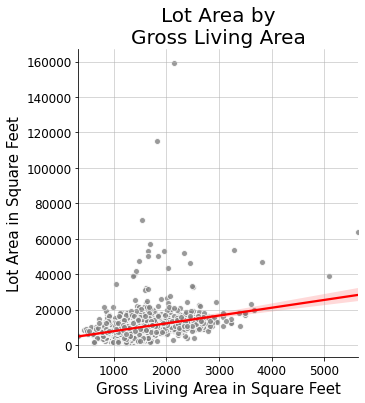

In [101]:
plt.figure(figsize=(6,4))
sns.lmplot(data=df_cl, x="Gr Liv Area", y="Lot Area", fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'},
           x_jitter=.4)
plt.title("Lot Area by\nGross Living Area", fontsize=20)
plt.xlabel("Gross Living Area in Square Feet", fontsize=15)
plt.ylabel("Lot Area in Square Feet", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 432x432 with 0 Axes>

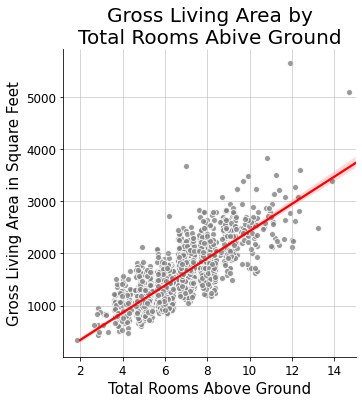

In [99]:
plt.figure(figsize=(6,6))
sns.lmplot(data=df_cl, x="TotRms AbvGrd", y="Gr Liv Area",
           fit_reg=True, line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey', 'edgecolors': 'white'},
           x_jitter=.4)
plt.title("Gross Living Area by\nTotal Rooms Above Ground", fontsize=20)
plt.xlabel("Total Rooms Above Ground", fontsize=15)
plt.ylabel("Gross Living Area in Square Feet", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [28]:
my_vars = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF',
          'Age At Sale', 'Years Since Remod/Add', 'TotRms AbvGrd', 'HasFireplace']
df_mv = df_cl[my_vars]
df_mv

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,1st Flr SF,Age At Sale,Years Since Remod/Add,TotRms AbvGrd,HasFireplace
0,130500.0,6,1479.0,2.0,725.0,725.0,34,5,6,0
1,220000.0,7,2122.0,2.0,913.0,913.0,13,12,8,1
2,109000.0,5,1057.0,1.0,1057.0,1057.0,57,3,5,0
3,174000.0,5,1444.0,2.0,384.0,744.0,4,3,7,0
4,138500.0,6,1445.0,2.0,676.0,831.0,110,17,6,0
...,...,...,...,...,...,...,...,...,...,...
2046,298751.0,8,1728.0,2.0,1884.0,1728.0,1,1,7,1
2047,82500.0,4,861.0,2.0,861.0,861.0,69,59,4,0
2048,177000.0,6,1913.0,2.0,896.0,1172.0,81,59,9,1
2049,144000.0,4,1200.0,1.0,1200.0,1200.0,53,53,6,1


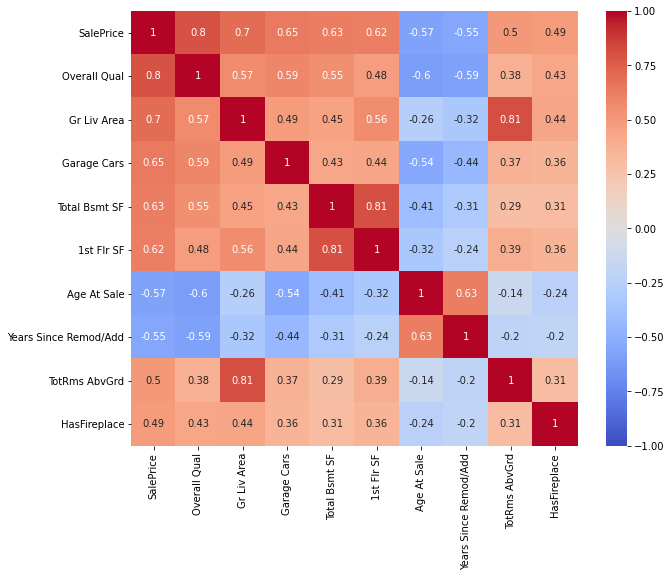

In [29]:
plt.figure(figsize=(10,8))

sns.heatmap(df_mv.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

<Figure size 864x432 with 0 Axes>

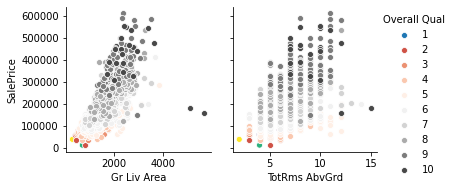

In [82]:
sns.pairplot(data=df_cl, x_vars=["Gr Liv Area", "TotRms AbvGrd"], y_vars="SalePrice", 
             kind="scatter", hue="Overall Qual", palette="RdGy")

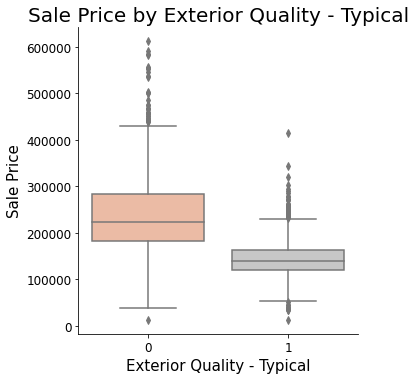

In [67]:
sns.catplot(data=df_cl, x="Exter Qual_TA", y="SalePrice", kind='box', palette="RdGy")
plt.title("Sale Price by Exterior Quality - Typical", fontsize=20)
plt.xlabel("Exterior Quality - Typical", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

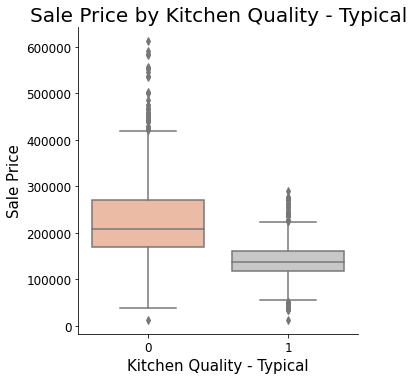

In [66]:
sns.catplot(data=df_cl, x="Kitchen Qual_TA", y="SalePrice", kind='box', palette="RdGy")
plt.title("Sale Price by Kitchen Quality - Typical", fontsize=20)
plt.xlabel("Kitchen Quality - Typical", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

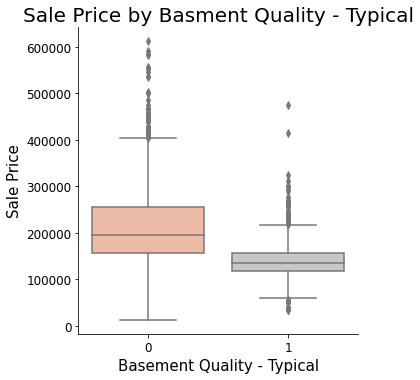

In [65]:
sns.catplot(data=df_cl, x="Bsmt Qual_TA", y="SalePrice", kind='box', palette="RdGy")
plt.title("Sale Price by Basment Quality - Typical", fontsize=20)
plt.xlabel("Basement Quality - Typical", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [34]:
my_vars = ['SalePrice', 'Exter Qual_TA', 'Kitchen Qual_TA', 'Bsmt Qual_TA']
df_mv = df_cl[my_vars]
df_mv

,SalePrice,Exter Qual_TA,Kitchen Qual_TA,Bsmt Qual_TA
0,130500.0,0,0,1
1,220000.0,0,0,0
2,109000.0,1,0,1
3,174000.0,1,1,0
4,138500.0,1,1,0
...,...,...,...,...
2046,298751.0,0,0,0
2047,82500.0,1,1,1
2048,177000.0,1,1,1
2049,144000.0,1,1,1


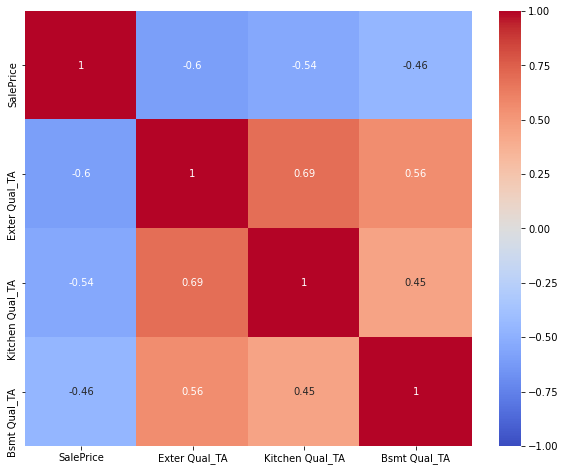

In [35]:
plt.figure(figsize=(10,8))

sns.heatmap(df_mv.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [36]:
my_vars = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', '1st Flr SF',
          'Age At Sale', 'Years Since Remod/Add', 'HasFireplace', 
          'Neighborhood_NridgHt', 'Sale Type_New','Garage Type_Attchd',
          'Open Porch SF', 'Wood Deck SF', 'Lot Area', 
          'HasBsmtFullBath', 'Central Air', 'IsHipRoof', 'Neighborhood_NoRidge',
          'Neighborhood_StoneBr', 'MS Zoning_RL', 'MS Zoning_RM', 'Garage Type_BuiltIn', 'House Style_2Story',
          'IsNotPavedDrive', 'NotStdElectrical', 'Garage Type_NoGarage', 'Bsmt Qual_TA',
          'Neighborhood_OldTown', 'Neighborhood_NAmes', 'Neighborhood_IDOTRR']
df_mv = df_cl[my_vars]
df_mv

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,1st Flr SF,Age At Sale,Years Since Remod/Add,HasFireplace,Neighborhood_NridgHt,Sale Type_New,Garage Type_Attchd,Open Porch SF,Wood Deck SF,Lot Area,HasBsmtFullBath,Central Air,IsHipRoof,Neighborhood_NoRidge,Neighborhood_StoneBr,MS Zoning_RL,MS Zoning_RM,Garage Type_BuiltIn,House Style_2Story,IsNotPavedDrive,NotStdElectrical,Garage Type_NoGarage,Bsmt Qual_TA,Neighborhood_OldTown,Neighborhood_NAmes,Neighborhood_IDOTRR
0,130500.0,6,1479.0,2.0,725.0,34,5,0,0,0,1,44.0,0.0,13517,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,220000.0,7,2122.0,2.0,913.0,13,12,1,0,0,1,74.0,0.0,11492,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,109000.0,5,1057.0,1.0,1057.0,57,3,0,0,0,0,52.0,0.0,7922,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,174000.0,5,1444.0,2.0,744.0,4,3,0,0,0,0,0.0,100.0,9802,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
4,138500.0,6,1445.0,2.0,831.0,110,17,0,0,0,0,59.0,0.0,14235,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751.0,8,1728.0,2.0,1728.0,1,1,1,0,0,1,276.0,0.0,11449,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2047,82500.0,4,861.0,2.0,861.0,69,59,0,0,0,0,0.0,158.0,12342,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2048,177000.0,6,1913.0,2.0,1172.0,81,59,1,0,0,0,0.0,0.0,7558,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2049,144000.0,4,1200.0,1.0,1200.0,53,53,1,0,0,1,189.0,0.0,10400,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0


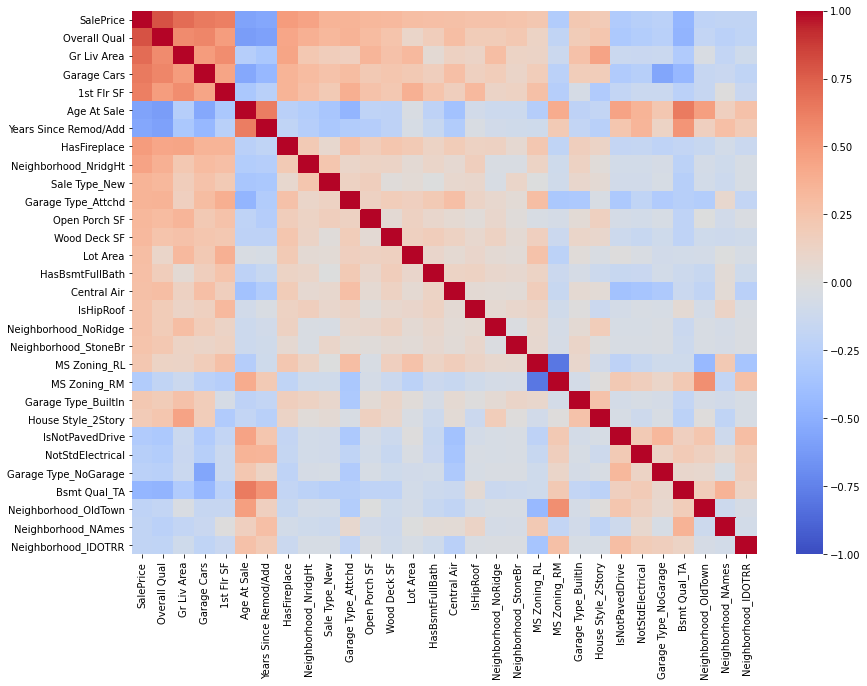

In [37]:
plt.figure(figsize=(14,10))

sns.heatmap(df_mv.corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=False);

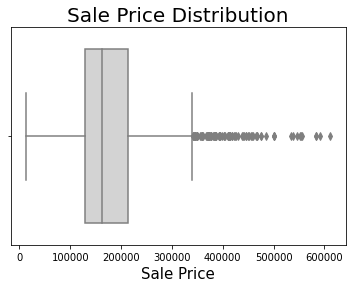

In [61]:
plt.figure(figsize=(6,4))
sns.boxplot(df_cl["SalePrice"], color='lightgrey')
plt.title("Sale Price Distribution", fontsize=20)
plt.xlabel("Sale Price", fontsize=15);

#### Look at just high priced houses and see what relates to them

In [39]:
df_cl_high = df_cl[df_cl["SalePrice"] >= 300_000]

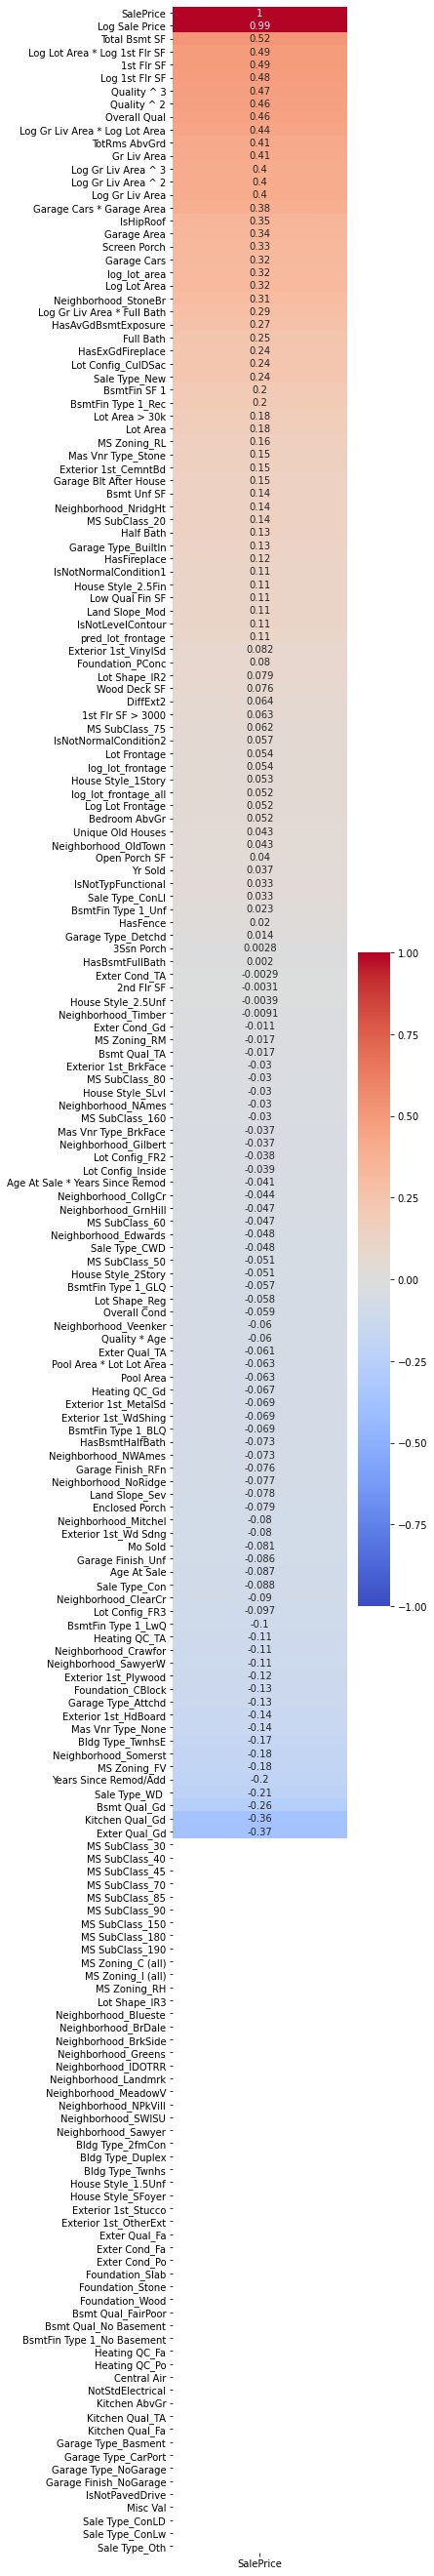

In [40]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl_high.corr()[["SalePrice"]].sort_values("SalePrice", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

#### Now do the reverse and look at cheap houses

In [41]:
df_cl_low = df_cl[df_cl["SalePrice"] < 120_000]

In [42]:
df_cl_low.shape

(349, 196)

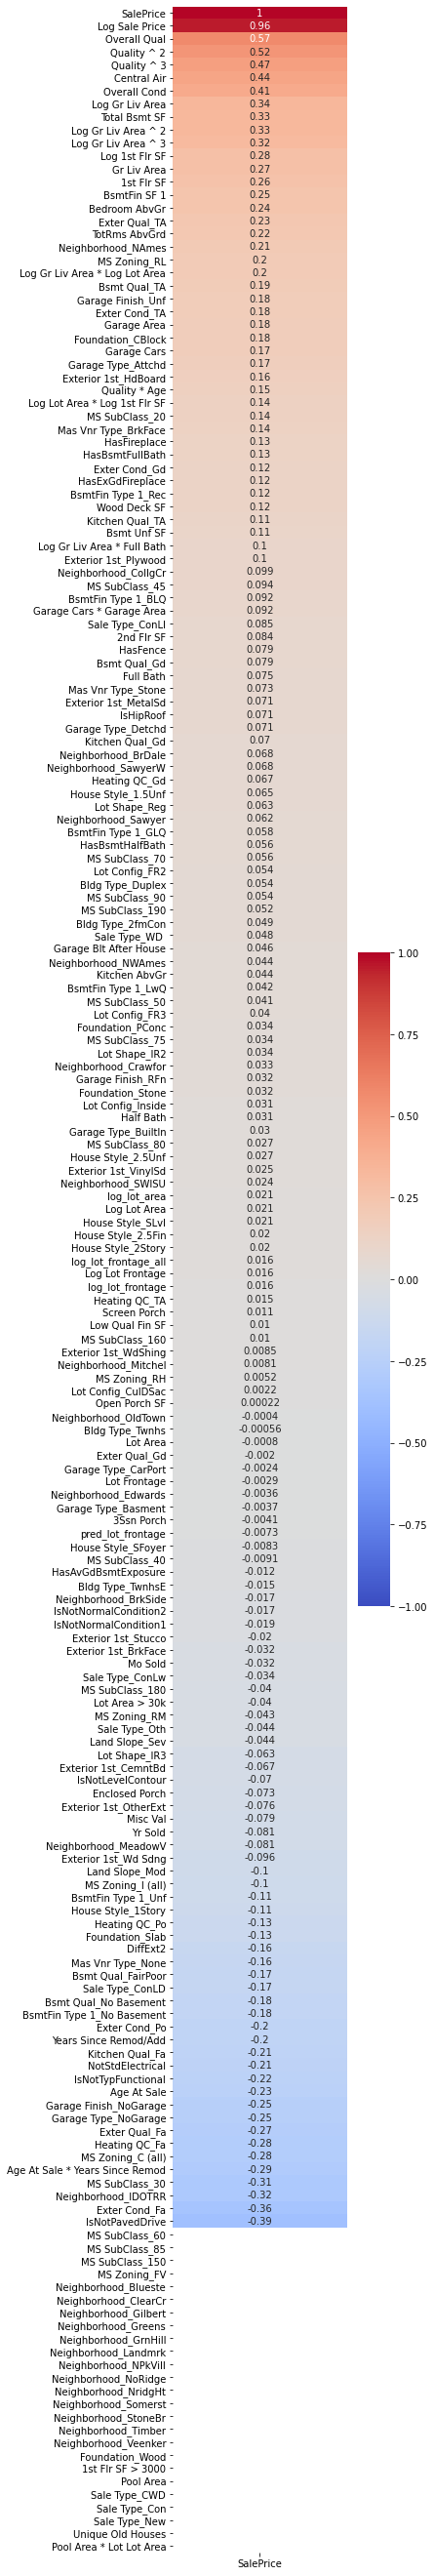

In [43]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl_low.corr()[["SalePrice"]].sort_values("SalePrice", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

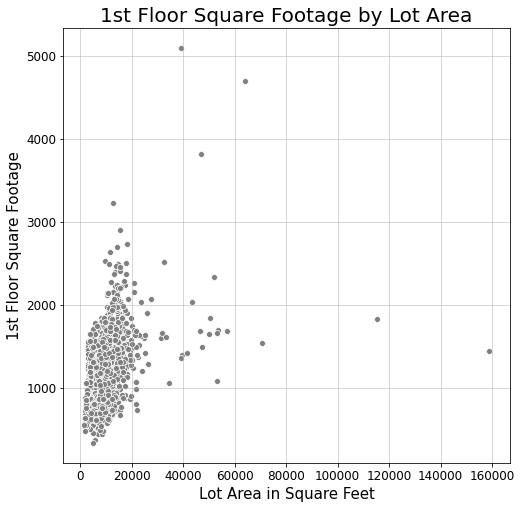

In [143]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_cl, x="Lot Area", y="1st Flr SF", color='grey')

plt.title("1st Floor Square Footage by Lot Area", fontsize=20)
plt.xlabel("Lot Area in Square Feet", fontsize=15)
plt.ylabel("1st Floor Square Footage", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [122]:
# Create new data frame that drops all vars used in the current best model (#34)
# Trying to tease out any other potential drivers 
X_list = ['Overall Qual', 'Sale Type_New', 'Years Since Remod/Add',  
          'MS SubClass_30', 'Gr Liv Area', 
          '1st Flr SF', 'Wood Deck SF', 'Total Bsmt SF', 
          'BsmtFin SF 1', 'Lot Area', 'Lot Config_CulDSac', 'Garage Cars', 
          'Garage Type_Attchd', 'Garage Type_Detchd', 'HasFireplace', 
          'HasBsmtFullBath', 'HasAvGdBsmtExposure', 'Bsmt Qual_TA', 
          'Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Full Bath', 'Half Bath', 
          'Central Air', 'IsHipRoof', 'Screen Porch', 'IsNotPavedDrive', 'NotStdElectrical', 
          'Heating QC_TA', 'Heating QC_Fa', 'Mas Vnr Type_Stone', 'Mas Vnr Type_BrkFace', 
          'Mas Vnr Type_None', 'Foundation_PConc', 'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Qual_Fa', 
          'Exter Cond_Fa', 'Neighborhood_NridgHt', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 
          'Neighborhood_OldTown', 'Neighborhood_IDOTRR']

df_cl_rest = df_cl.drop(columns=X_list)
df_cl_rest.head()

,SalePrice,MS SubClass_20,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Frontage,Lot Area > 30k,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,IsNotLevelContour,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,Neighborhood_Veenker,IsNotNormalCondition1,IsNotNormalCondition2,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Overall Cond,Age At Sale,Exterior 1st_BrkFace,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 1st_OtherExt,DiffExt2,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_CBlock,Foundation_Slab,Foundation_Stone,Foundation_Wood,Bsmt Qual_Gd,Bsmt Qual_FairPoor,Bsmt Qual_No Basement,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 1_No Basement,Bsmt Unf SF,Heating QC_Gd,Heating QC_Po,1st Flr SF > 3000,2nd Flr SF,Low Qual Fin SF,HasBsmtHalfBath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual_Fa,TotRms AbvGrd,IsNotTypFunctional,HasExGdFireplace,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_NoGarage,Garage Blt After House,Garage Finish_NoGarage,Garage Finish_RFn,Garage Finish_Unf,Garage Area,Open Porch SF,Enclosed Porch,3Ssn Porch,Pool Area,HasFence,Misc Val,Mo Sold,Yr Sold,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_Oth,Sale Type_WD,Unique Old Houses,log_lot_area,pred_lot_frontage,log_lot_frontage,log_lot_frontage_all,Log Sale Price,Log 1st Flr SF,Log Gr Liv Area,Log Lot Area,Log Lot Frontage,Quality * Age,Log Lot Area * Log 1st Flr SF,Garage Cars * Garage Area,Log Gr Liv Area * Log Lot Area,Log Gr Liv Area * Full Bath,Pool Area * Lot Lot Area,Age At Sale * Years Since Remod,Log Gr Liv Area ^ 2,Log Gr Liv Area ^ 3,Quality ^ 2,Quality ^ 3
0,130500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,53.947522,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,8,34,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,192.0,0,0,0,754.0,0.0,0,3,1,0,6,0,0,0,0,0,0,0,0,1,0,475.0,44.0,0,0,0.0,0,0,3,2010,0,0,0,0,0,0,1,0,9.511703,53.947522,NaN,3.988012,11.779129,6.586172,7.299121,9.511703,3.988012,204,62.645712,950.0,69.427079,14.598243,0.0,170,53.277174,388.876565,36,216
1,220000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,276.0,0,0,0,1209.0,0.0,0,4,1,0,8,0,0,0,0,0,0,1,0,1,0,559.0,74.0,0,0,0.0,0,0,4,2009,0,0,0,0,0,0,1,0,9.349406,49.121928,3.761200,3.761200,12.301383,6.816736,7.660114,9.349406,3.761200,91,63.732434,1118.0,71.617522,15.320229,0.0,156,58.677351,449.475220,49,343
2,109000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,68.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,57,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,326.0,0,0,0,0.0,0.0,0,3,1,0,5,0,0,0,0,0,0,0,0,0,1,246.0,52.0,0,0,0.0,0,0,1,2010,0,0,0,0,0,0,1,0,8.977399,62.024937,4.219508,4.219508,11.599103,6.963190,6.963190,8.977399,4.219508,285,62.5

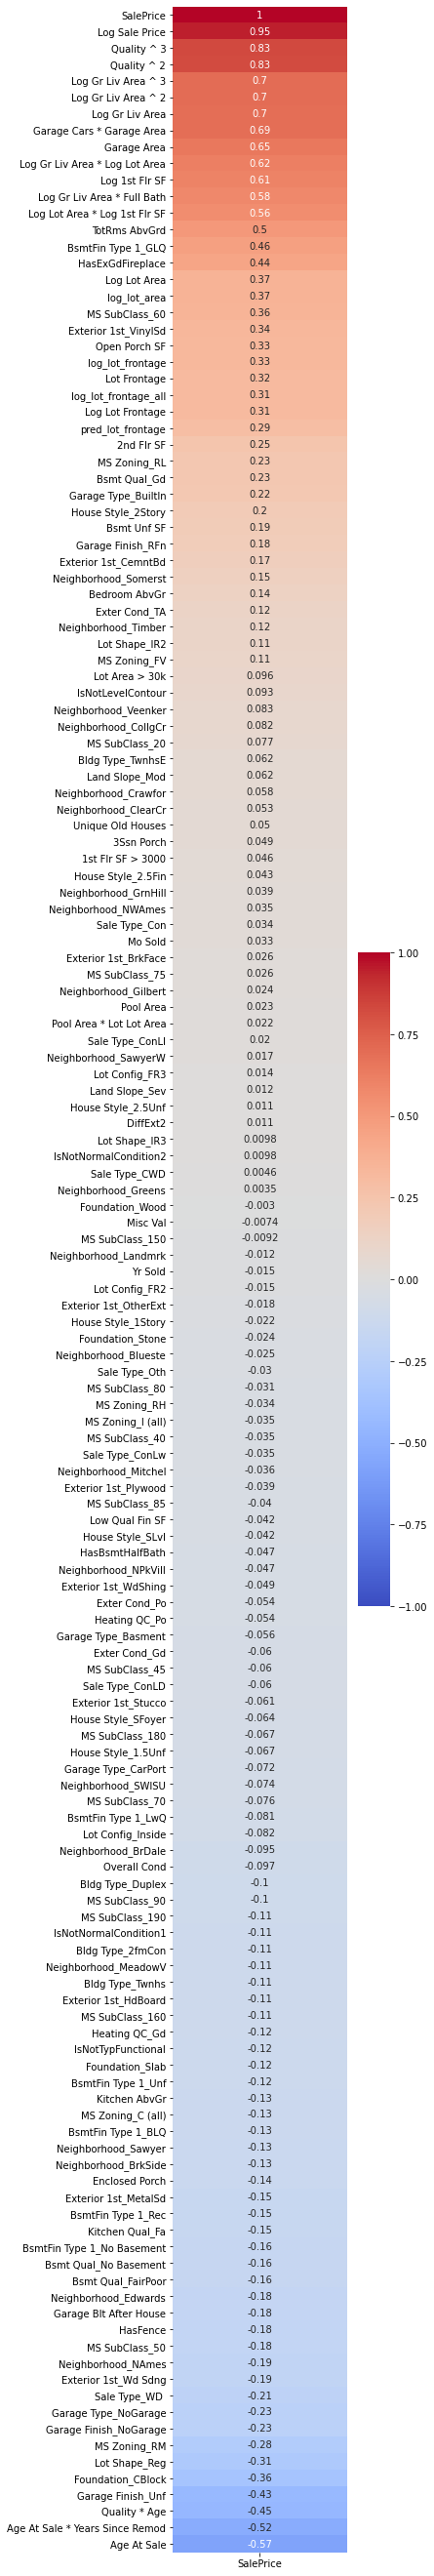

In [46]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl_rest.corr()[["SalePrice"]].sort_values("SalePrice", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

## Log Sale Price

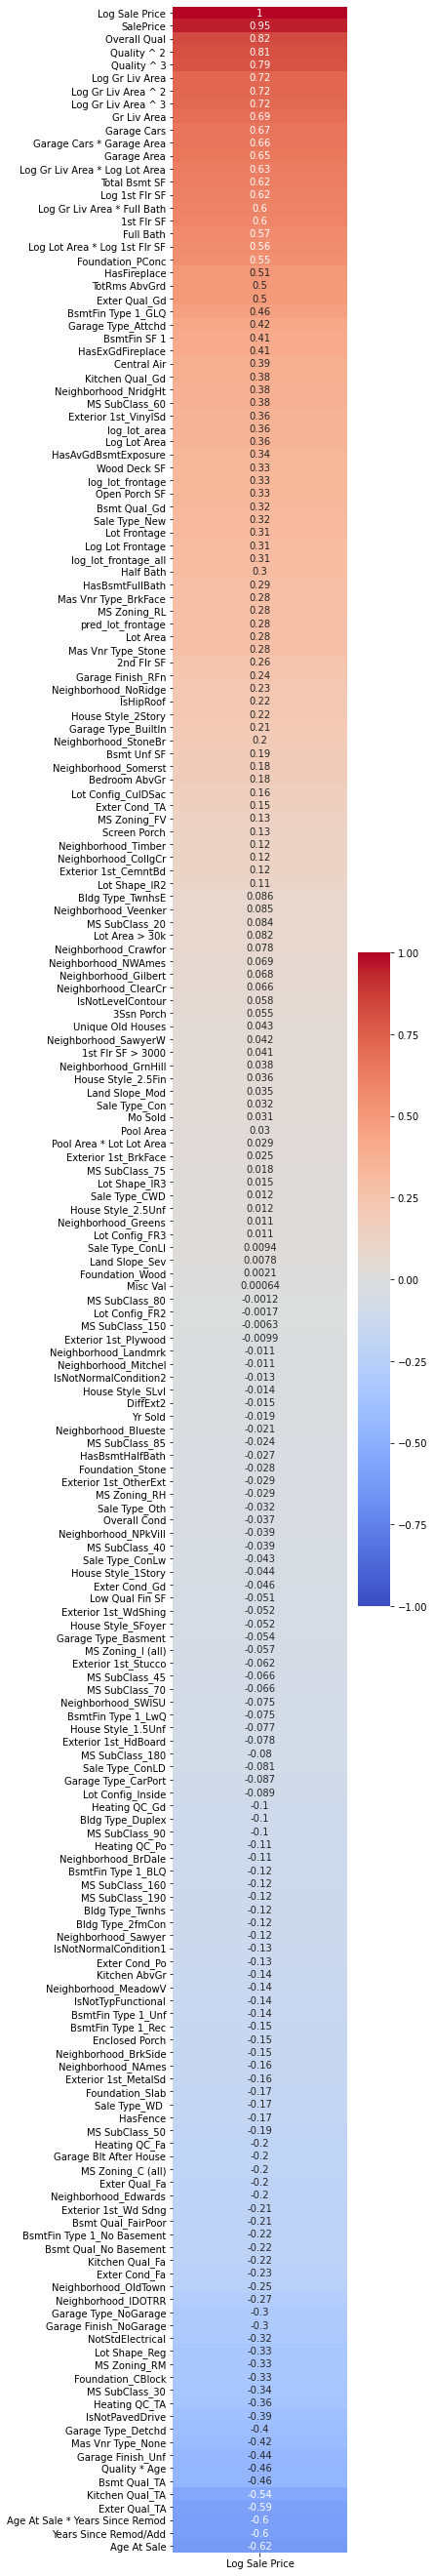

In [47]:
plt.figure(figsize=(4, 48))
sns.heatmap(df_cl.corr()[["Log Sale Price"]].sort_values("Log Sale Price", ascending=False),
            cmap = "coolwarm",
            vmin=-1,
            vmax=1,
            annot = True);

<Figure size 576x576 with 0 Axes>

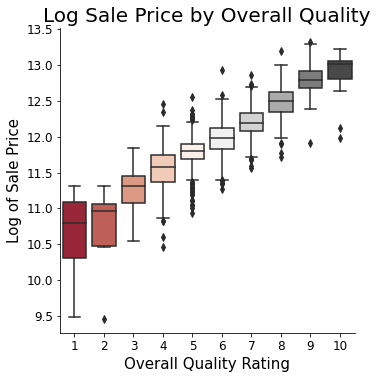

In [121]:
plt.figure(figsize=(8,8))
sns.catplot(data=df_cl, x="Overall Qual", y="Log Sale Price", kind='box', palette='RdGy' )

plt.title("Log Sale Price by Overall Quality", fontsize=20)
plt.xlabel("Overall Quality Rating", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 576x576 with 0 Axes>

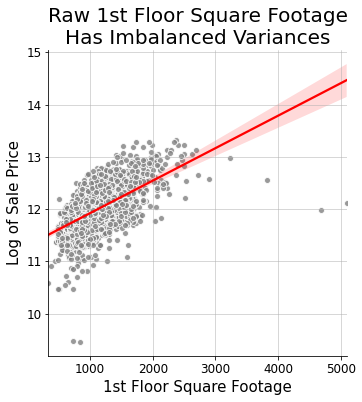

In [72]:
plt.figure(figsize=(8,8))
x = "1st Flr SF"
y = "Log Sale Price"
sns.lmplot(x, y, data=df_cl, fit_reg=True, line_kws={'color': 'red'}, scatter_kws={'color': 'grey',
                                                                                  'edgecolors': 'white'})

plt.title("Raw 1st Floor Square Footage\nHas Imbalanced Variances", fontsize=20)
plt.xlabel("1st Floor Square Footage", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 576x576 with 0 Axes>

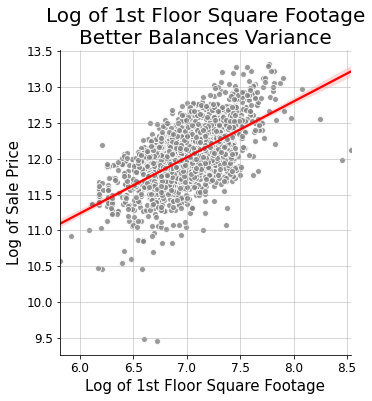

In [115]:
plt.figure(figsize=(8,8))
x = "Log 1st Flr SF"
y = "Log Sale Price"
sns.lmplot(x, y, data=df_cl, fit_reg=True, line_kws={'color': 'red'}, scatter_kws={'color': 'grey',
                                                                                  'edgecolors': 'white'});


plt.title("Log of 1st Floor Square Footage\nBetter Balances Variance", fontsize=20)
plt.xlabel("Log of 1st Floor Square Footage", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 576x576 with 0 Axes>

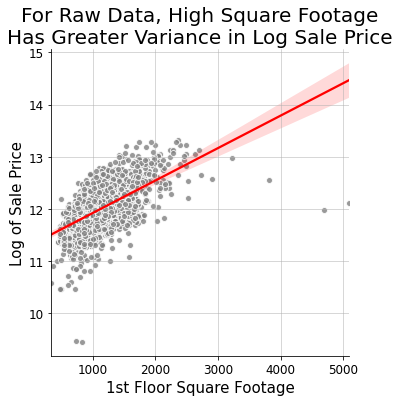

In [62]:
plt.figure(figsize=(8,8))
x = "1st Flr SF"
y = "Log Sale Price"
sns.lmplot(x, y, data=df_cl, fit_reg=True, line_kws={'color': 'red'}, scatter_kws={'color': 'grey',
                                                                                  'edgecolors': 'white'});


plt.title("For Raw Data, High Square Footage\nHas Greater Variance in Log Sale Price", fontsize=20)
plt.xlabel("1st Floor Square Footage", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 576x576 with 0 Axes>

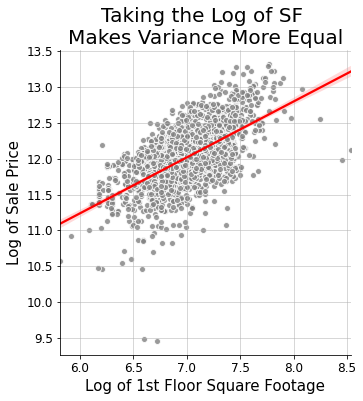

In [64]:
plt.figure(figsize=(8,8))
x = "Log 1st Flr SF"
y = "Log Sale Price"
sns.lmplot(x, y, data=df_cl, fit_reg=True, line_kws={'color': 'red'}, scatter_kws={'color': 'grey',
                                                                                   'edgecolors': 'white'})
plt.title("Taking the Log of SF \nMakes Variance More Equal", fontsize=20)
plt.xlabel("Log of 1st Floor Square Footage", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

''

<Figure size 432x432 with 0 Axes>

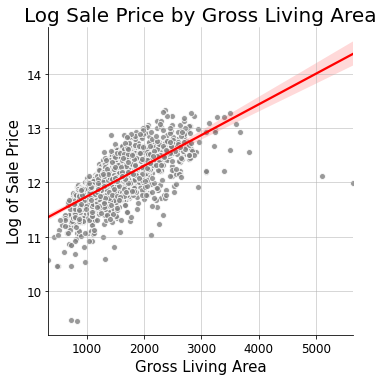

In [67]:
plt.figure(figsize=(6,6))
sns.lmplot(data=df_cl, 
           x="Gr Liv Area", 
           y="Log Sale Price",
           fit_reg=True,
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey','edgecolors': 'white'})

plt.title("Log Sale Price by Gross Living Area", fontsize=20)
plt.xlabel("Gross Living Area", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 432x432 with 0 Axes>

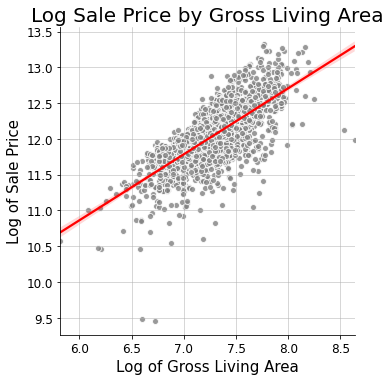

In [68]:
plt.figure(figsize=(6,6))
sns.lmplot(data=df_cl, 
           x="Log Gr Liv Area", 
           y="Log Sale Price",
           fit_reg=True,
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey','edgecolors': 'white'})

plt.title("Log Sale Price by Gross Living Area", fontsize=20)
plt.xlabel("Log of Gross Living Area", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 432x432 with 0 Axes>

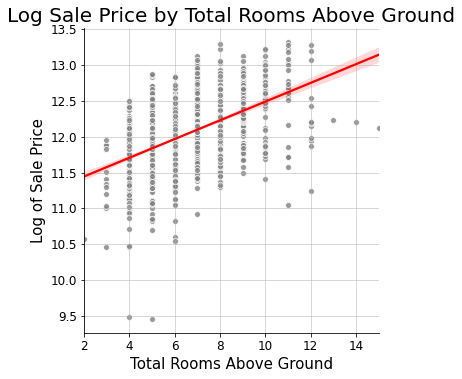

In [82]:
plt.figure(figsize=(6,6))
sns.lmplot(data=df_cl, 
           x="TotRms AbvGrd", 
           y="Log Sale Price",
           fit_reg=True,
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey',
                        'edgecolors': 'white'})

plt.title("Log Sale Price by Total Rooms Above Ground", fontsize=20)
plt.xlabel("Total Rooms Above Ground", fontsize=15)
plt.ylabel("Log of Sale Price", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

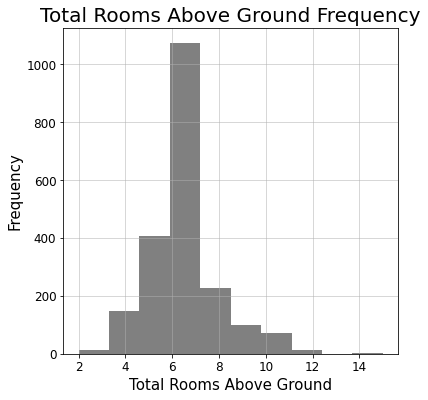

In [74]:
df_cl["TotRms AbvGrd"].hist(figsize=(6,6), color='grey')

plt.title("Total Rooms Above Ground Frequency", fontsize=20)
plt.xlabel("Total Rooms Above Ground", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

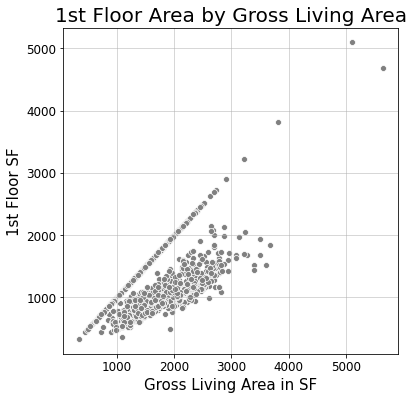

In [84]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_cl, x="Gr Liv Area", y="1st Flr SF", color='grey');

plt.title("1st Floor Area by Gross Living Area", fontsize=20)
plt.xlabel("Gross Living Area in SF", fontsize=15)
plt.ylabel("1st Floor SF", fontsize=15)
plt.grid(b=True, linewidth=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

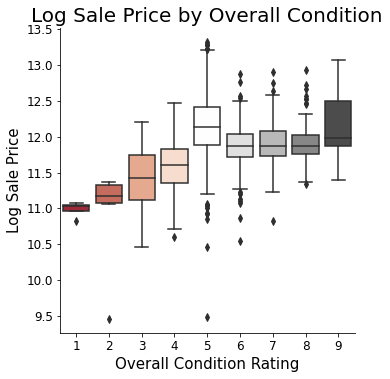

In [86]:
sns.catplot(data=df_cl, x="Overall Cond", y="Log Sale Price", kind='box', palette='RdGy' )

plt.title("Log Sale Price by Overall Condition", fontsize=20)
plt.xlabel("Overall Condition Rating", fontsize=15)
plt.ylabel("Log Sale Price", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

<Figure size 432x432 with 0 Axes>

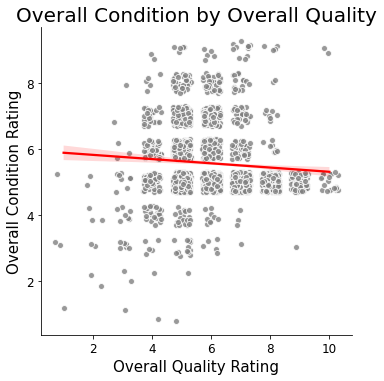

In [113]:
plt.figure(figsize=(6,6))
sns.lmplot(data=df_cl, 
           x="Overall Qual", 
           y="Overall Cond",
           fit_reg=True,
           line_kws={'color': 'red'}, 
           scatter_kws={'color': 'grey',
                        'edgecolors': 'white'},
           x_jitter=.3,
           y_jitter=.3)

plt.title("Overall Condition by Overall Quality", fontsize=20)
plt.xlabel("Overall Quality Rating", fontsize=15)
plt.ylabel("Overall Condition Rating", fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

## Tableau visualizations

<img src="../images/Average Sale Price by Neighborhood.png" />

<img src="../images/Avg Sale Price by Avg Quality By Neighborhood.png" />

<img src="../images/Sales Price by Year Built And Overall Quality.png" />